<a href="https://colab.research.google.com/github/EdmarBortoletto/Ciencias-de-Dados/blob/main/T2_Paradigmas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## T2 - Paradigmas - Alunos: Edmar e Robson

**1.	Explique brevemente o que é um sistema de recomendação.**

R: Um sistema de recomendação é uma ferramenta que sugere produtos, serviços ou informações aos usuários com base em dados históricos e padrões de comportamento.

**2.	Descreva uma possível maneira de implementar um sistema de recomendação baseado em popularidade.**

R: Um sistema baseado em popularidade recomenda os itens mais populares (mais vendidos, mais visualizados, mais bem avaliados) a todos os usuários. Pode ser implementado classificando os itens por uma métrica de popularidade e recomendando os itens do topo da lista.

**3.	Quais são os principais tipos de sistemas de recomendação? Descreva cada um deles.**

R:Baseado em conteúdo: Recomenda itens semelhantes aos que o usuário já gostou, usando características dos itens.
Filtragem colaborativa: Recomenda itens que usuários semelhantes gostaram, usando comportamento e avaliações dos usuários.
Híbrido: Combina métodos de conteúdo e colaborativo para melhorar a precisão das recomendações.

**4.	Quais são os principais desafios enfrentados pelos sistemas de recomendação?**

R:Escalabilidade: Manter desempenho eficiente com grandes volumes de dados.
Sparsity: Lidar com dados esparsos quando há poucas interações por usuário.
Cold Start: Recomendar para novos usuários ou novos itens com pouca informação.
Precisão e relevância: Garantir que as recomendações sejam precisas e relevantes.

**5.	O que é uma série temporal? Dê exemplos de dados que podem ser analisados como séries temporais.**

R:Uma série temporal é uma sequência de dados pontos coletados ou registrados em intervalos de tempo uniformes. Exemplos incluem preços de ações, temperaturas diárias, vendas mensais.

**6.	Quais são os componentes típicos de uma série temporal? Descreva cada componente.**

R: Tendência: Movimento de longo prazo na série de dados.
Sazonalidade: Padrões repetitivos ou cíclicos em intervalos regulares.
Ciclos: Flutuações irregulares devido a fatores econômicos ou outros.
Ruído (Resíduo): Variações aleatórias ou irregulares não explicadas por outros componentes.

**7.	Como você identificaria a sazonalidade em uma série temporal?**

R: A sazonalidade pode ser identificada visualmente através de gráficos de séries temporais que mostram padrões repetitivos, ou usando técnicas estatísticas como a análise de decomposição ou a função de autocorrelação.


**8.	Faça a previsão para os ultimos 20 meses para a base vendas_mensais.**

In [1]:
import pandas as pd
import matplotlib.pylab as plt
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error

In [2]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.3 MB/s eta 0:00:00


In [11]:
from pmdarima.arima import auto_arima

In [6]:
#carregando base de dados
df = pd.read_csv('vendas_mensais.csv')
print(dataset.head())

         Data      Vendas
0  2019-01-01  104.967142
1  2019-02-01   99.504200
2  2019-03-01  108.249775
3  2019-04-01  117.887643
4  2019-05-01  101.197882


In [13]:
dateparse = lambda dates: pd.to_datetime(dates, format='%Y-%m')


In [21]:
time_series = df['Vendas']
time_series

Data
2019-01-01    104.967142
2019-02-01     99.504200
2019-03-01    108.249775
2019-04-01    117.887643
2019-05-01    101.197882
                 ...    
2036-12-01    207.476140
2037-01-01    192.189367
2037-02-01    197.578220
2037-03-01    195.119966
2037-04-01    200.818741
Name: Vendas, Length: 220, dtype: float64

In [22]:
time_series[1]

99.50420032289968

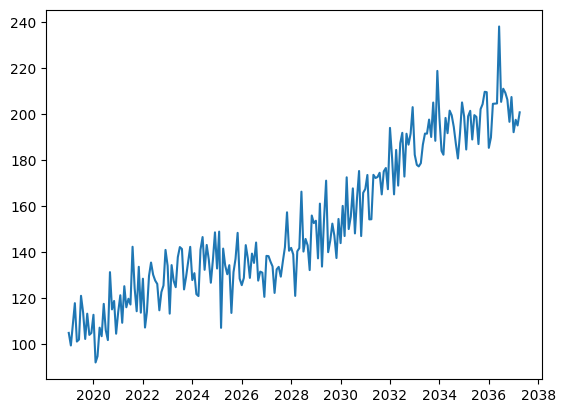

In [23]:
plt.plot(time_series)
plt.show()

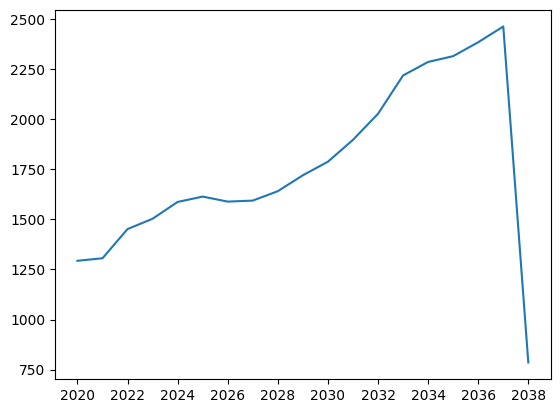

In [24]:
#esta resampleando a serie temporal para o nivel anual('A' - indica resampling anual) e em seguida
#somando os valores dentro de cada ano
time_series_ano = time_series.resample('A').sum()
plt.plot(time_series_ano)
plt.show()

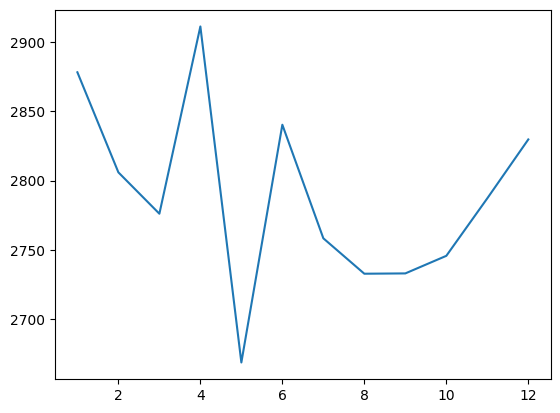

In [25]:
time_series_mes = time_series.groupby([lambda x: x.month]).sum()
plt.plot(time_series_mes)
plt.show()

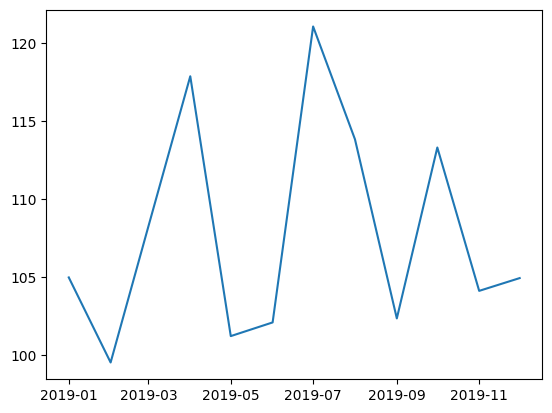

In [26]:
time_series_datas = time_series['2019-01-01':'2019-12-01']
plt.plot(time_series_datas)
plt.show()

In [27]:
#Decomposição da serie temporal
decomposicao = seasonal_decompose(time_series)
tendencia = decomposicao.trend
sazonal = decomposicao.seasonal
aleatorio = decomposicao.resid

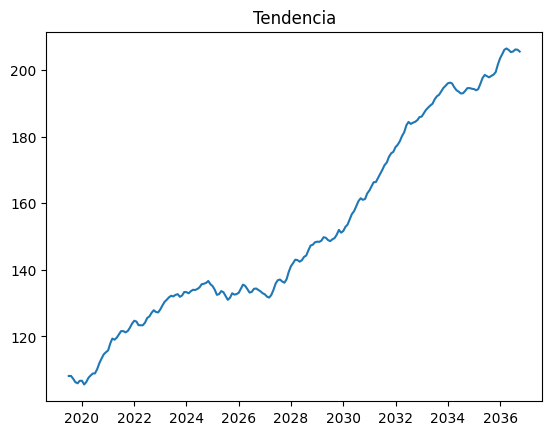

In [28]:
plt.title("Tendencia")
plt.plot(tendencia)
plt.show()

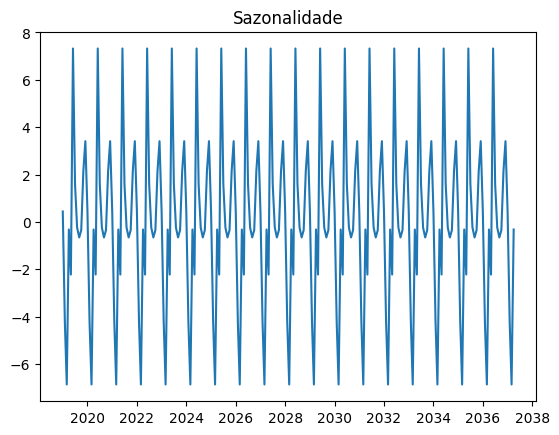

In [29]:
plt.title('Sazonalidade')
plt.plot(sazonal)
plt.show()

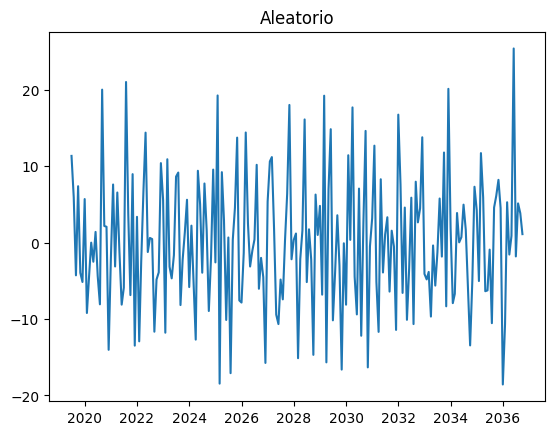

In [30]:
plt.title('Aleatorio')
plt.plot(aleatorio)
plt.show()

In [ ]:
# previsão com ARIMA
#parametros p, q e d

In [31]:
model = auto_arima(time_series)
#traz os melhores parametros para o ARIMA
print(model.order)

(0, 1, 1)


In [44]:
predictions = model.predict(n_periods=24)
print(predictions)

2037-05-01    205.170866
2037-06-01    205.628222
2037-07-01    206.085579
2037-08-01    206.542936
2037-09-01    207.000293
2037-10-01    207.457650
2037-11-01    207.915007
2037-12-01    208.372364
2038-01-01    208.829721
2038-02-01    209.287078
2038-03-01    209.744434
2038-04-01    210.201791
2038-05-01    210.659148
2038-06-01    211.116505
2038-07-01    211.573862
2038-08-01    212.031219
2038-09-01    212.488576
2038-10-01    212.945933
2038-11-01    213.403290
2038-12-01    213.860647
2039-01-01    214.318003
2039-02-01    214.775360
2039-03-01    215.232717
2039-04-01    215.690074
Freq: MS, dtype: float64


In [45]:
#grafico de previsoes
print(len(time_series))

220


In [52]:
train = time_series[:200]
teste = time_series[200:]

In [53]:
print(teste.index)

DatetimeIndex(['2035-09-01', '2035-10-01', '2035-11-01', '2035-12-01',
               '2036-01-01', '2036-02-01', '2036-03-01', '2036-04-01',
               '2036-05-01', '2036-06-01', '2036-07-01', '2036-08-01',
               '2036-09-01', '2036-10-01', '2036-11-01', '2036-12-01',
               '2037-01-01', '2037-02-01', '2037-03-01', '2037-04-01'],
              dtype='datetime64[ns]', name='Data', freq=None)


In [54]:
model2 = auto_arima(train, suppress_warnings=True)
prediction = pd.DataFrame(model2.predict(n_periods=20), index=teste.index)
prediction.columns = ['vendas_predictions']
print(prediction)

            vendas_predictions
Data                          
2035-09-01          197.755265
2035-10-01          198.221511
2035-11-01          198.687757
2035-12-01          199.154003
2036-01-01          199.620250
2036-02-01          200.086496
2036-03-01          200.552742
2036-04-01          201.018988
2036-05-01          201.485234
2036-06-01          201.951480
2036-07-01          202.417726
2036-08-01          202.883972
2036-09-01          203.350219
2036-10-01          203.816465
2036-11-01          204.282711
2036-12-01          204.748957
2037-01-01          205.215203
2037-02-01          205.681449
2037-03-01          206.147695
2037-04-01          206.613941


In [55]:
mse_arima = mean_squared_error(teste, prediction)
print("Erro quadratico medio MSE", mse_arima)


Erro quadratico medio MSE 125.81614904253529


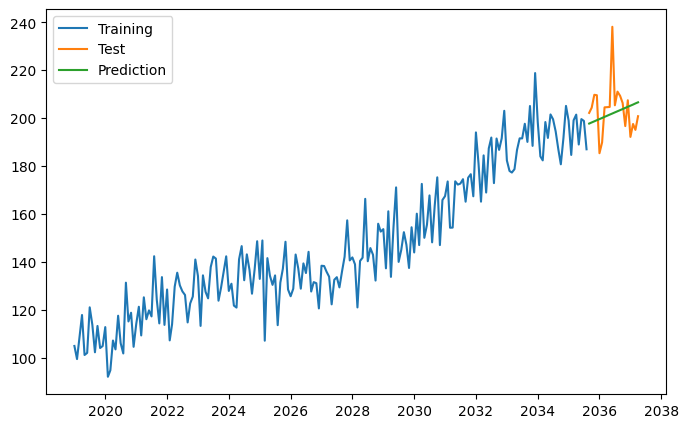

In [56]:
plt.figure(figsize=(8,5))
plt.plot(train, label='Training')
plt.plot(teste, label='Test')
plt.plot(prediction,label='Prediction')
plt.legend()